In [2]:
import pandas as pd

df = pd.read_csv("RepML_original\data\processed\clean\hyperion.csv", sep=',')
df.head(20)

,Domanda,Testo,Stralcio,Repertorio
0,A cosa serve questo testo per il perseguimento...,Dunque vediamo se ho capito: Conte le canta a ...,Dunque vediamo se ho capito:,dichiarazione di intenti
1,NaN,NaN,Conte le canta a Salvini e alla Meloni,sancire
2,NaN,NaN,questi reagiscono e le cantano a loro volta a ...,giustificazione
3,NaN,NaN,Mentana si smarca da Conte e finisce con foto ...,sancire
4,NaN,NaN,Siamo tornati per un attimo alla normalità:,commento
5,NaN,NaN,meraviglia assoluta!,giudizio
6,NaN,#Conte è un pericolo per la libertà e la democ...,#Conte è un pericolo per la libertà e la democ...,non risposta
7,NaN,"Comunque, se tutti i giornalisti che oggi si s...","Comunque,",commento
8,NaN,NaN,se tutti i giornalisti che oggi si stracciano ...,valutazione
9,NaN,NaN,forse oggi starebbero più tranquilli,possibilità


In [54]:
df.describe()

,stlen
count,35148.000000
mean,34.972886
std,80.219531
min,1.000000
25%,9.000000
50%,17.000000
75%,30.000000
max,2559.000000


<AxesSubplot:>

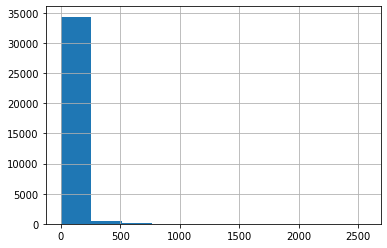

In [50]:
df['stlen'] = df.Stralcio.apply(lambda x: len(x.split()))
df.stlen.hist()

In [52]:
df[df.stlen > 64].Repertorio.value_counts()

descrizione                 1863
commento                     211
valutazione                  193
sancire                      178
generalizzazione             104
giudizio                      90
considerazione                76
non risposta                  68
contrapposizione              37
specificazione                34
opinione                      33
prescrizione                  31
dichiarazione di intenti      27
deresponsabilizzazione        24
ridimensionamento             21
previsione                    20
conferma                      15
possibilità                   14
giustificazione               12
proposta                      11
implicazione                  10
causa                          6
anticipazione                  4
Name: Repertorio, dtype: int64

<AxesSubplot:>

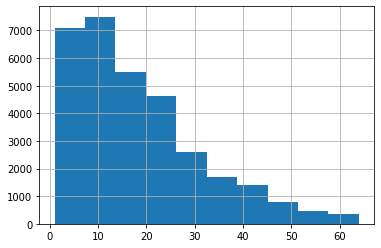

In [55]:
df[df.stlen <= 64].stlen.hist()

In [60]:
df = df[df.stlen <= 64]

In [3]:
text = []
repertoirs = []
reps = 0
for index, row in df.iterrows():
    if not (pd.isna(row['Testo'])):
        if reps != 0:
            repertoirs.append(reps)
        text.append(row['Testo'])
        reps = []
    if row['Stralcio'] in text[-1]:
        reps.append(row['Repertorio'])
repertoirs.append(reps)

In [40]:
df1 = pd.DataFrame({'text': text, 'repertoirs': repertoirs})
df1.head()

,text,repertoirs
0,Dunque vediamo se ho capito: Conte le canta a ...,"[dichiarazione di intenti, sancire, giustifica..."
1,#Conte è un pericolo per la libertà e la democ...,[non risposta]
2,"Comunque, se tutti i giornalisti che oggi si s...","[commento, possibilità]"
3,"""Ha suscitato scandalo la proposta di Salvini ...","[sancire, valutazione, conferma, conferma, giu..."
4,Non era mai successo nella lunga storia del Pi...,"[sancire, specificazione, conferma, causa, cau..."


In [41]:
df1['textlen'] = df1.text.apply(lambda x: len(x.split()))

In [42]:
#df1 = df1[df1.textlen <= 64]
df1 = df1[df1.textlen > 64]

In [43]:
len(df1)

3151

<AxesSubplot:>

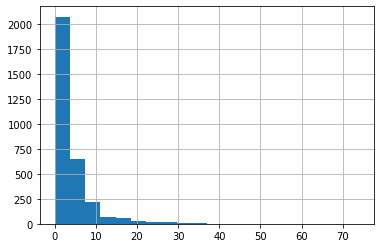

In [44]:
df1['num_rep'] = df1.repertoirs.apply(lambda x: len(x))
df1.num_rep.hist(bins=20)

In [14]:
df1 = df1[df1.num_rep != 0]

In [15]:
len(df1)

12141

In [16]:
max(df1.num_rep)

10

In [17]:
df1[df1.num_rep == 10]

,text,repertoirs,textlen,num_rep
8389,Grazie Giulia. Al Tg ho visto si comincia a pa...,"[generalizzazione, descrizione, ridimensioname...",63,10
10366,"Zaia!!!!! Si concentri sulle cure, ci sono sa?...","[deresponsabilizzazione, prescrizione, giustif...",44,10


In [18]:
df1[df1.text == df1[df1.num_rep == 10].text[8389]]

,text,repertoirs,textlen,num_rep
8389,Grazie Giulia. Al Tg ho visto si comincia a pa...,"[generalizzazione, descrizione, ridimensioname...",63,10


In [19]:
df[df.Testo == df1[df1.num_rep == 10].text[8389]]

,Domanda,Testo,Stralcio,Repertorio
21879,NaN,Grazie Giulia. Al Tg ho visto si comincia a pa...,Grazie Giulia.,generalizzazione


In [20]:
df.iloc[21879:21900]

,Domanda,Testo,Stralcio,Repertorio
21879,NaN,Grazie Giulia. Al Tg ho visto si comincia a pa...,Grazie Giulia.,generalizzazione
21880,NaN,NaN,Al Tg ho visto si comincia a parlare anche del...,descrizione
21881,NaN,NaN,"In alcuni ambienti, a mio avviso,",ridimensionamento
21882,NaN,NaN,"dovrebbero renderle obbligatorie,",prescrizione
21883,NaN,NaN,sui mezzi di trasporto o nelle sale d' aspett...,specificazione
21884,NaN,NaN,spero presto.,commento
21885,NaN,NaN,P.S.,ridimensionamento
21886,NaN,NaN,spero la zona arancio continui per molto tempo...,descrizione
21887,NaN,NaN,"Ma rt del Veneto, ti risulta 0,81???",ridimensionamento
21888,NaN,NaN,Buona serata.,generalizzazione


In [ ]:
dup = df1[df1['text'].duplicated(keep=False)].sort_values(by=['text'])
dup

,text,repertoirs,textlen,num_rep
5415,4 su 10 test rapidi sbagliano completamente l ...,[valutazione],39,1
5396,4 su 10 test rapidi sbagliano completamente l ...,"[valutazione, deresponsabilizzazione]",39,2
5729,@zaiapresidente Finora aveva dato prova di cap...,"[giudizio, conferma, specificazione, prescrizi...",32,5
5711,@zaiapresidente Finora aveva dato prova di cap...,"[giudizio, contrapposizione, prescrizione]",32,3
7612,"A ieri, bollettino del sito Ministero della sa...",[commento],47,1
...,...,...,...,...
3091,"È un buona cosa, ma io non ci conterei più di ...","[contrapposizione, possibilità, sancire]",43,3
5002,È un po’ tardi per lanciare questo messaggio d...,"[valutazione, giudizio]",43,2
5121,È un po’ tardi per lanciare questo messaggio d...,[sancire],43,1
6181,È una disordinanza ....un idiozia “innovativa”...,[commento],37,1


In [ ]:
dup['repertoirs_str'] = dup.repertoirs.apply(lambda x: ' '.join(x))

In [ ]:
m1 = ~dup.duplicated(['text', 'repertoirs_str'], keep=False)
m2 = dup.duplicated(['text'], keep=False)
dup[m1 & m2]

,text,repertoirs,num_rep,textlen,repertoirs_str
5415,4 su 10 test rapidi sbagliano completamente l ...,[valutazione],1,39,valutazione
5396,4 su 10 test rapidi sbagliano completamente l ...,"[valutazione, deresponsabilizzazione]",2,39,valutazione deresponsabilizzazione
5729,@zaiapresidente Finora aveva dato prova di cap...,"[giudizio, conferma, specificazione, prescrizi...",5,32,giudizio conferma specificazione prescrizione ...
5711,@zaiapresidente Finora aveva dato prova di cap...,"[giudizio, contrapposizione, prescrizione]",3,32,giudizio contrapposizione prescrizione
7361,"Adesso io mi chiedo test rapidi, molecolari, s...",[generalizzazione],1,92,generalizzazione
...,...,...,...,...,...
3091,"È un buona cosa, ma io non ci conterei più di ...","[contrapposizione, possibilità, sancire]",3,43,contrapposizione possibilità sancire
5002,È un po’ tardi per lanciare questo messaggio d...,"[valutazione, giudizio]",2,43,valutazione giudizio
5121,È un po’ tardi per lanciare questo messaggio d...,[sancire],1,43,sancire
6181,È una disordinanza ....un idiozia “innovativa”...,[commento],1,37,commento


In [45]:
labels = {
    'anticipazione': [],
    'causa': [],
    'commento': [],
    'conferma': [],
    'considerazione': [],
    'contrapposizione': [],
    'deresponsabilizzazione': [],
    'descrizione': [],
    'dichiarazione di intenti': [],
    'generalizzazione': [],
    'giudizio': [],
    'giustificazione': [],
    'implicazione': [],
    'non risposta': [],
    'opinione': [],
    'possibilità': [],
    'prescrizione': [],
    'previsione': [],
    'proposta': [],
    'ridimensionamento': [],
    'sancire': [],
    'specificazione': [],
    'valutazione': []
}

for index, row in df1.iterrows():
    for key in labels:
        if key in row['repertoirs']:
            labels[key].append(1)
        else:
            labels[key].append(0)

In [46]:
for key in labels:
    df1[key] = labels[key]

In [47]:
pd.set_option('max_columns', None)
df1.describe()

,textlen,num_rep,anticipazione,causa,commento,conferma,considerazione,contrapposizione,deresponsabilizzazione,descrizione,dichiarazione di intenti,generalizzazione,giudizio,giustificazione,implicazione,non risposta,opinione,possibilità,prescrizione,previsione,proposta,ridimensionamento,sancire,specificazione,valutazione
count,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,270.582355,3.853063,0.008886,0.050778,0.189146,0.066328,0.046334,0.101872,0.031101,0.570295,0.081561,0.072675,0.173913,0.032053,0.077436,0.049191,0.104411,0.067598,0.113615,0.108537,0.025706,0.099651,0.303078,0.146303,0.182164
std,250.384602,5.327526,0.093861,0.219578,0.391687,0.248894,0.210242,0.302528,0.173619,0.495113,0.273739,0.259644,0.379095,0.176170,0.267324,0.216300,0.305842,0.251094,0.317393,0.311107,0.158282,0.299582,0.459662,0.353466,0.386041
min,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,165.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2559.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df2 = df1.drop(['repertoirs'], axis=1)

In [49]:
df2.sum()

text                        "Ha suscitato scandalo la proposta di Salvini ...
textlen                                                                852605
num_rep                                                                 12141
anticipazione                                                              28
causa                                                                     160
commento                                                                  596
conferma                                                                  209
considerazione                                                            146
contrapposizione                                                          321
deresponsabilizzazione                                                     98
descrizione                                                              1797
dichiarazione di intenti                                                  257
generalizzazione                                                

In [61]:
df.Repertorio.value_counts()

sancire                     5449
commento                    4192
descrizione                 3019
giudizio                    2674
valutazione                 1930
prescrizione                1889
contrapposizione            1376
specificazione              1362
opinione                    1310
previsione                  1150
non risposta                1095
ridimensionamento           1081
generalizzazione             962
implicazione                 696
conferma                     624
dichiarazione di intenti     616
deresponsabilizzazione       614
possibilità                  602
causa                        467
giustificazione              428
proposta                     245
considerazione               236
anticipazione                 49
Name: Repertorio, dtype: int64

In [82]:
gb = df.groupby('Repertorio')
train_list = []
val_list = []
for x in gb.groups:
    # Validation set creation
    class_df = gb.get_group(x)
    val = class_df.sample(frac=0.3)
    train = pd.concat([class_df,val]).drop_duplicates(keep=False)

    #train_list.append(train.head(500))
    train_list.append(train)
    val_list.append(val)

train_df = pd.concat(train_list)
test_val_df = pd.concat(val_list)

In [83]:
gb = test_val.groupby('Repertorio')
val_list = []
test_list = []
for x in gb.groups:
    # Validation set creation
    class_df = gb.get_group(x)
    val = class_df.sample(frac=0.5)
    test = pd.concat([class_df,val]).drop_duplicates(keep=False)

    #train_list.append(train.head(500))
    val_list.append(train)
    test_list.append(val)

test_df = pd.concat(test_list)
val_df = pd.concat(val_list)

In [84]:
test_df.Repertorio.value_counts()

sancire                     801
commento                    629
descrizione                 462
giudizio                    392
valutazione                 305
prescrizione                288
contrapposizione            204
opinione                    204
specificazione              188
previsione                  173
non risposta                166
ridimensionamento           158
generalizzazione            142
implicazione                102
conferma                    100
possibilità                  97
dichiarazione di intenti     96
deresponsabilizzazione       94
causa                        67
giustificazione              64
proposta                     36
considerazione               36
anticipazione                 9
Name: Repertorio, dtype: int64

In [ ]:
df = df[['Stralcio', 'Repertorio']]

In [106]:
df.describe()

,Stralcio,Repertorio
count,32066,32066
unique,31847,23
top,Grazie,sancire
freq,20,5449


In [107]:
test_val = df.sample(frac=0.30, random_state=100)
train = pd.concat([df,test_val]).drop_duplicates(keep=False)

In [108]:
test_val.Repertorio.value_counts()

sancire                     1602
commento                    1258
descrizione                  925
giudizio                     783
valutazione                  610
prescrizione                 575
opinione                     409
contrapposizione             407
specificazione               377
previsione                   346
non risposta                 331
ridimensionamento            317
generalizzazione             283
implicazione                 203
conferma                     199
possibilità                  194
dichiarazione di intenti     192
deresponsabilizzazione       187
causa                        134
giustificazione              127
considerazione                72
proposta                      71
anticipazione                 18
Name: Repertorio, dtype: int64

In [109]:
test = test_val.sample(frac=0.50, random_state=102)
val = pd.concat([test_val,test]).drop_duplicates(keep=False)

In [110]:
val.Repertorio.value_counts()

sancire                     805
commento                    638
descrizione                 464
giudizio                    406
valutazione                 299
prescrizione                287
contrapposizione            196
opinione                    196
specificazione              193
previsione                  170
non risposta                155
ridimensionamento           149
generalizzazione            128
implicazione                112
possibilità                 108
deresponsabilizzazione      103
dichiarazione di intenti     94
conferma                     93
causa                        69
giustificazione              61
considerazione               27
proposta                     25
anticipazione                10
Name: Repertorio, dtype: int64

In [65]:
val.sum()

C:\Users\Anna\AppData\Local\Temp/ipykernel_8444/3386245976.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  val.sum()


Domanda                                                       0
Stralcio      #Veneto Manifestazione No #Dad questa mattina ...
Repertorio    descrizionesanciregiustificazionesancireprescr...
stlen                                                     87748
dtype: object

In [38]:
test.sum()

text                        I 9 studenti iscritti alla competizione nella ...
textlen                                                                 52528
num_rep                                                                  3003
anticipazione                                                               3
causa                                                                      22
commento                                                                  482
conferma                                                                   46
considerazione                                                             19
contrapposizione                                                          147
deresponsabilizzazione                                                     53
descrizione                                                               199
dichiarazione di intenti                                                   32
generalizzazione                                                

In [102]:
val.describe()

,stlen
count,4796.000000
mean,18.093828
std,13.136881
min,1.000000
25%,8.000000
50%,15.000000
75%,25.000000
max,64.000000


In [ ]:
test_val.sum()

text                        Per favore, mettete qualche controllo in più n...
textlen                                                                240026
num_rep                                                                  8723
anticipazione                                                              10
causa                                                                     118
commento                                                                 1187
conferma                                                                  151
considerazione                                                             66
contrapposizione                                                          347
deresponsabilizzazione                                                    164
descrizione                                                               846
dichiarazione di intenti                                                  115
generalizzazione                                                

In [ ]:
val.sum()

text                        - Zaia, manca il personale nelle case di ripos...
textlen                                                                118959
num_rep                                                                  4449
anticipazione                                                               7
causa                                                                      70
commento                                                                  581
conferma                                                                   80
considerazione                                                             30
contrapposizione                                                          193
deresponsabilizzazione                                                     81
descrizione                                                               410
dichiarazione di intenti                                                   55
generalizzazione                                                

In [112]:
train.head()

,Stralcio,Repertorio
0,Dunque vediamo se ho capito:,dichiarazione di intenti
1,Conte le canta a Salvini e alla Meloni,sancire
2,questi reagiscono e le cantano a loro volta a ...,giustificazione
4,Siamo tornati per un attimo alla normalità:,commento
5,meraviglia assoluta!,giudizio


In [111]:
train.to_csv("train64.csv", index=False)
val.to_csv("val64.csv", index=False)
test.to_csv("test64.csv", index=False)

In [ ]:
df1.to_csv("multi_rep.csv", index=False)

In [ ]:
import numpy as np
df3 = train.drop(['text', 'textlen', 'num_rep'], axis=1)
np.array((1 - df3.mean()) /  df3.mean())

array([514.25      ,  39.41176471,   2.79558011,  28.11016949,
        65.91558442,  11.50606796,  24.44444444,   4.18360161,
        36.20216606,  16.23244147,   5.80647292,  39.25390625,
        27.7849162 ,  13.91316932,  13.3125    ,  32.45779221,
         8.39380128,  16.890625  ,  68.62837838,  20.60377358,
         2.5682133 ,  16.49575552,   8.56824513])

In [ ]:
(len(df3) - df3.sum()) / df3.sum()

anticipazione               514.250000
causa                        39.411765
commento                      2.795580
conferma                     28.110169
considerazione               65.915584
contrapposizione             11.506068
deresponsabilizzazione       24.444444
descrizione                   4.183602
dichiarazione di intenti     36.202166
generalizzazione             16.232441
giudizio                      5.806473
giustificazione              39.253906
implicazione                 27.784916
non risposta                 13.913169
opinione                     13.312500
possibilità                  32.457792
prescrizione                  8.393801
previsione                   16.890625
proposta                     68.628378
ridimensionamento            20.603774
sancire                       2.568213
specificazione               16.495756
valutazione                   8.568245
dtype: float64